# Keras Simple autopilot Demo

In [1]:
# needed for matplotlib in jupyter notebook
%matplotlib inline

# import required modules
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import pandas as pd
import os

Text(0, 0.5, 'Count')

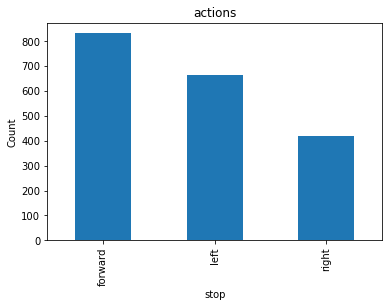

In [2]:
# prepare data
data = pd.read_csv(os.path.join('..', 'simulator', 'logs', '20200903-101909.usablelog'))
data.shape
data = data[data.stop != 'stop']
data_random_forward = data[data.stop == 'forward'].sample(n=int(data.shape[0]/2))
data.drop(data_random_forward.index,inplace=True)
data['stop'].value_counts().plot(kind='bar')
plt.title('actions')
plt.xlabel('stop')
plt.ylabel('Count')





In [3]:
# split into training and test data (10% test data)
data_test = data.sample(n=int(data.shape[0]/10))
data.drop(data_test.index,inplace=True)

#labels

conv_labels = [0 if values == 'forward' else values for values in data.stop ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels = conv_labels

#labels test 
conv_labels = [0 if values == 'forward' else values for values in data_test.stop ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels_test = conv_labels
print(len(labels_test))
print(len(labels))

191
1725


In [4]:
# convert image data
train = data.drop([ 'stop'],axis=1).values
test = data_test.drop([ 'stop'],axis=1).values

train = train.reshape(train.shape[0],20,20,3)
test = test.reshape(test.shape[0],20,20,3)

## Data preparation

In [5]:
# create a smaller test set

x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

# convert classes to one-hot encoding
num_classes = 3
y_train = keras.utils.to_categorical(labels, num_classes)
y_test = keras.utils.to_categorical(labels_test, num_classes)
print("one-hot labels:\n", y_train[:3])


one-hot labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Training

In [6]:
# create model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(20, 20, 3)),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=5)

Train on 1380 samples, validate on 345 samples
Epoch 1/5
1380/1380 [==============================] - 3s 2ms/sample - loss: 1.0288 - accuracy: 0.4580 - val_loss: 0.9690 - val_accuracy: 0.5362
Epoch 2/5
1380/1380 [==============================] - 2s 2ms/sample - loss: 0.9582 - accuracy: 0.5254 - val_loss: 0.9488 - val_accuracy: 0.5449
Epoch 3/5
1380/1380 [==============================] - 2s 2ms/sample - loss: 0.8910 - accuracy: 0.5732 - val_loss: 0.9244 - val_accuracy: 0.6000
Epoch 4/5
1380/1380 [==============================] - 2s 2ms/sample - loss: 0.8612 - accuracy: 0.5949 - val_loss: 0.9669 - val_accuracy: 0.5797
Epoch 5/5
1380/1380 [==============================] - 2s 2ms/sample - loss: 0.8174 - accuracy: 0.6254 - val_loss: 1.0510 - val_accuracy: 0.5449


## Evaluation

In [8]:
# evaluate model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score)

191/191 [==============================] - 0s 717us/sample - loss: 0.9720 - accuracy: 0.5497
Test accuracy: [0.9719967642379681, 0.5497382]


In [9]:
model.save(os.path.join('..', 'models', 'my-keras-model.h5'))